In [3]:
import pandas as pd

structure_data = pd.read_csv('./train.csv')
structure_data

,a,b,c,d
0,4,0.030,0,1.134
1,4,0.028,0,1.104
2,4,0.026,0,1.171
3,4,0.024,0,1.242
4,4,0.022,0,1.174
5,8,0.030,0,1.233
6,8,0.028,0,1.323
7,8,0.026,0,1.372
8,8,0.024,0,1.248
9,8,0.022,0,1.199


In [4]:
structure_data['d'].value_counts()

d
1.134    2
1.406    1
1.064    1
1.047    1
1.257    1
1.265    1
1.387    1
1.189    1
1.269    1
1.398    1
1.009    1
1.429    1
1.486    1
1.507    1
1.767    1
1.872    1
1.905    1
1.825    1
1.042    1
1.963    1
1.104    1
1.199    1
1.171    1
1.242    1
1.174    1
1.233    1
1.323    1
1.372    1
1.248    1
1.502    1
1.957    1
1.328    1
1.479    1
1.386    1
1.302    1
1.719    1
1.785    1
1.942    1
1.808    1
Name: count, dtype: int64

In [5]:
structure_data_shuffled = structure_data.sample(n=len(structure_data), random_state=1)
structure_data_shuffled

,a,b,c,d
2,4,0.026,0,1.171
31,12,0.028,1,1.398
3,4,0.024,0,1.242
21,4,0.028,1,1.042
27,8,0.026,1,1.387
29,8,0.022,1,1.269
22,4,0.026,1,1.064
39,24,0.022,1,1.808
19,24,0.022,0,1.963
26,8,0.028,1,1.265


In [6]:
pd.get_dummies(structure_data_shuffled['b']).head()

,0.022,0.024,0.026,0.028,0.030
2,False,False,True,False,False
31,False,False,False,True,False
3,False,True,False,False,False
21,False,False,False,True,False
27,False,False,True,False,False


In [7]:
# get the data without the result
structure_data_x_data = structure_data_shuffled.drop('d', axis=1)
structure_data_y_data = structure_data_shuffled['d']

In [8]:
#split the data into test, trin and validation data
train_pd, test_pd, val_pd = structure_data_shuffled[:20], structure_data_shuffled[20:30], structure_data_shuffled[30:]
len(train_pd), len(test_pd), len(val_pd)

(20, 10, 10)

In [9]:
# try to get the data from the separeted data
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20, 3), (20,), (10, 3), (10,), (10, 3), (10,))

In [10]:
# preprocessing with standard deviation to normalise data
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :3] = scaler.transform(A[:, :3])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [11]:
X_train.shape, X_val.shape, X_test.shape

X_train

array([[-1.104083  ,  0.10804236, -1.36277029],
       [-0.02692885,  0.82832477,  0.73379939],
       [-1.104083  , -0.61224005, -1.36277029],
       [-1.104083  ,  0.82832477,  0.73379939],
       [-0.56550593,  0.10804236,  0.73379939],
       [-0.56550593, -1.33252245,  0.73379939],
       [-1.104083  ,  0.10804236,  0.73379939],
       [ 1.58880237, -1.33252245,  0.73379939],
       [ 1.58880237, -1.33252245, -1.36277029],
       [-0.56550593,  0.82832477,  0.73379939],
       [-0.02692885,  0.10804236,  0.73379939],
       [ 1.58880237,  0.10804236, -1.36277029],
       [-0.02692885,  1.54860717,  0.73379939],
       [ 1.58880237,  0.82832477,  0.73379939],
       [-0.02692885, -0.61224005,  0.73379939],
       [-0.56550593, -0.61224005,  0.73379939],
       [-1.104083  , -1.33252245, -1.36277029],
       [-0.02692885, -1.33252245, -1.36277029],
       [-0.02692885,  1.54860717, -1.36277029],
       [ 1.58880237,  1.54860717,  0.73379939]])

In [12]:
pd.DataFrame(X_train).head()

,0,1,2
0,-1.104083,0.108042,-1.362770
1,-0.026929,0.828325,0.733799
2,-1.104083,-0.612240,-1.362770
3,-1.104083,0.828325,0.733799
4,-0.565506,0.108042,0.733799


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

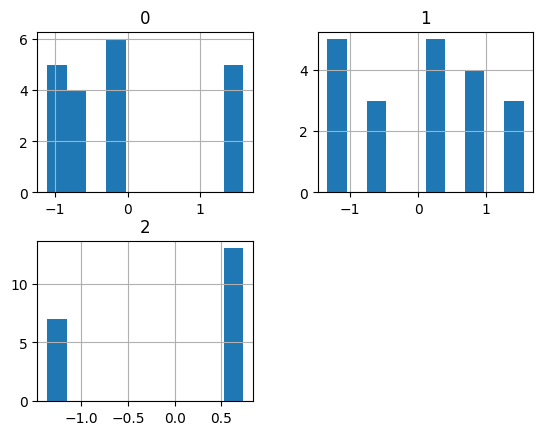

In [13]:
pd.DataFrame(X_train).hist()

<Axes: >

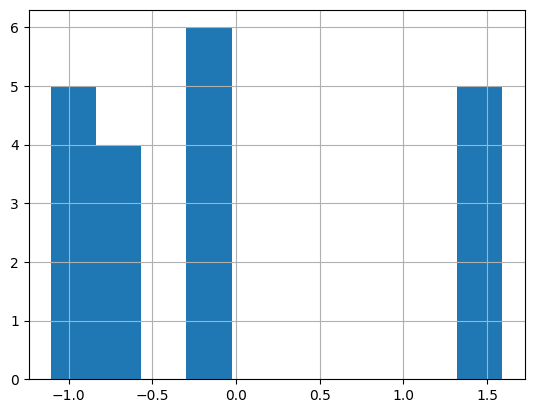

In [14]:
pd.DataFrame(X_train)[0].hist()

In [15]:
# try to train with different training models
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
#print(mse(lm.predict(X_train), y_train), mse(lm.predict(X_val), y_val))
print(rmse(lm.predict(X_train), y_train), rmse(lm.predict(X_val), y_val)), rmse(lm.predict(X_test), y_test)

0.06367995673795708 0.10992270420588204


(None, 0.06230277748293102)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
rmse(knn.predict(X_train), y_train), rmse(knn.predict(X_val), y_val),rmse(knn.predict(X_test), y_test)

(0.18824054690740782, 0.17434779035020778, 0.19616407163392596)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10, n_estimators=1000).fit(X_train, y_train)
rmse(rfr.predict(X_train), y_train), rmse(rfr.predict(X_val), y_val), rmse(rfr.predict(X_test), y_test)

(0.03503063159436553, 0.08631194131984335, 0.06366777895764826)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1).fit(X_train, y_train)
rmse(gbr.predict(X_train), y_train), rmse(gbr.predict(X_val), y_val),rmse(gbr.predict(X_test), y_test)

(0.11065225658366981, 0.10990367761586725, 0.13701253749645487)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((3,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.6257 - root_mean_squared_error: 1.6204 - val_loss: 1.4099 - val_root_mean_squared_error: 1.1874
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.8152 - root_mean_squared_error: 1.3473 - val_loss: 0.9800 - val_root_mean_squared_error: 0.9900
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.2039 - root_mean_squared_error: 1.0972 - val_loss: 0.6477 - val_root_mean_squared_error: 0.8048
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.7829 - root_mean_squared_error: 0.8848 - val_loss: 0.4329 - val_root_mean_squared_error: 0.6579
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.5477 - root_mean_squared_error: 0.7401 - val_loss: 0.3231 - val_root_mean_squared_error: 0.5684
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4819 - root_mean_squared_error: 0.6942 - val_loss: 0.2823 - val_root_mean_squared_error: 0.5313
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.4838 

In [21]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn.keras')
rmse(simple_nn.predict(X_train), y_train), rmse(simple_nn.predict(X_test), y_test), rmse(simple_nn.predict(X_val), y_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


(0.08787536605512788, 0.1139780692047929, 0.08527489690629307)

In [22]:
medium_nn = Sequential()
medium_nn.add(InputLayer((3,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.4250 - root_mean_squared_error: 1.1937 - val_loss: 10.9719 - val_root_mean_squared_error: 3.3124
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 6.5443 - root_mean_squared_error: 2.5582 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6719
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2055 - root_mean_squared_error: 0.4534 - val_loss: 0.9299 - val_root_mean_squared_error: 0.9643
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.9415 - root_mean_squared_error: 0.9703 - val_loss: 1.3759 - val_root_mean_squared_error: 1.1730
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.4358 - root_mean_squared_error: 1.1983 - val_loss: 1.5021 - val_root_mean_squared_error: 1.2256
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.5161 - root_mean_squared_error: 1.2313 - val_loss: 1.4346 - val_root_mean_squared_error: 1.1978
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.4097 

In [ ]:
medium_nn = load_model('models/medium_nn.keras')
rmse(medium_nn.predict(X_train), y_train), rmse(medium_nn.predict(X_val), y_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


(0.06427364795946715, 0.11153006936582516)

In [23]:
large_nn = Sequential()
large_nn.add(InputLayer((3,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.3206 - root_mean_squared_error: 1.5233 - val_loss: 10763.9209 - val_root_mean_squared_error: 103.7493
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 9541.5938 - root_mean_squared_error: 97.6811 - val_loss: 0.3123 - val_root_mean_squared_error: 0.5588
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.4191 - root_mean_squared_error: 0.6474 - val_loss: 1.6577 - val_root_mean_squared_error: 1.2875
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.7302 - root_mean_squared_error: 1.3154 - val_loss: 1.1412 - val_root_mean_squared_error: 1.0683
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.0655 - root_mean_squared_error: 1.0322 - val_loss: 1.7438 - val_root_mean_squared_error: 1.3205
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.1558 - root_mean_squared_error: 1.4683 - val_loss: 0.8979 - val_root_mean_squared_error: 0.9476
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss

In [26]:
large_nn = load_model('models/large_nn.keras')
rmse(large_nn.predict(X_train), y_train), rmse(large_nn.predict(X_val), y_val), rmse(large_nn.predict(X_test), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(0.6473594053958731, 0.5587963905236641, 0.6310855512473292)

In [ ]:
rmse(gbr.predict(X_test), y_test)

0.13701253749645487